In [1]:
import pandas as pd
import numpy as np
import glob
# burada veri analizi, veri işleme ve dosya işlemi için gerekli kütüphaneleri import ediyoruz.
# pandas ile veri analizi ve veri çerçevesi oluşturma, numpy ile bilimsel hesaplamalar, glob ile belirli klasördeki dosyaları arayıp listelemek üzere işlem yapıyoruz.

# görüntü işleme için PIL kütüphanesini ve matplotlib kütüphanesininin pyplot modülünü içe aktarıyoruz. PIL ile görüntü açma, işleme ve oluşturma işlemleri yapılır.
from PIL import Image
import matplotlib.pyplot as plt #bu modül veri görselleştirme, grafik ve çizim oluşturma amacıyla kullanılır.

#bu modül ile performans ölçümü, gerekiyorsa gecikmeler eklemek gibi durumlar için kullanırız.
import time 

# Pytorch temellerinin sağlanması
import torch #bu kısımlarda ilgili kütüphaneleri sağlıyoruz. gpu hızlandırması, tensör işlemleri gibi detayları sağlamak için kullanırız. 
import torch.nn as nn #yapay sinir ağları oluşturmak için sınıfları ve fonksiyonlar sağlamak için import ediyoruz.
import torch.nn.functional as F #yapay sinir ağında bize lazım olan çeşitli fonksiyonları sağlıyoruz. bu işlem, genel olarak aktivasyon fonksiyonları,kayıp fonksiyonları gibi fonksiyonları sağlar.
import torch.optim as optim # bu modül, sinir ağlarını eğitmek için kullanılan optimizasyon algoritmalarını sağlar.
from torch.optim import lr_scheduler # bu modül ile modelin öğrenme hızı gerektiğinde değiştirilir ve optimize edilir.
from torchvision.datasets import ImageFolder #bu modül ise diskteki bir klasörden veri setlerini yüklemek amacıyla kullanırız.


# Pytorch kütüphanesinin veri setlerini yönetmesi
from torch.utils.data.sampler import SubsetRandomSampler # bu kısım ile veri setinin bölünmesini ve rastgele örnekler seçmesini sağlıyoruz.
from torch.utils.data import Dataset, DataLoader # bu kısımda "dataset" ile veri setine dair yükleme erişme yollarını tanımlamak için import ederiz.
                                                 #dataloader ile de "dataset" ile tanımlanmış veri setini mode eğitiminde kullanmak üzere yığınlar halinde yükleyerek hazır hale getirmesini sağlarız.

# Pytorch ile veri büyütme/artırma
import torchvision #görüntü işleme kütüphanesi olan torchvision'ı içe aktarıyoruz.
from torchvision import datasets, models, transforms, utils #veri setlerini yüklemek için, önceden olan modellere erişim için, görüntü dönüşüm işlemleri için ve görüntü işleme için bu kısımları sağlıyoruz.
from torchvision.transforms import v2 # görüntü dönüşüm işlemlerinde güncel gereklilikler için bu kısmı sağlıyoruz.

import cv2 #görüntü işleme için araçlar gerektiğinden bu kütüphaneyi sağlıyoruz.
import os # cihazın işletim sistemine bağlantı kurup işlevlere(dosya işlemleri) erişim sağlaması için kütüphaneyi sağlıyoruz.
from glob import glob # dosyadan belirli desenlere uyan dosyaları bulması için glob modülünü sağlıyoruz.
from tqdm import tqdm #kod çalışırken döngülerde bize geri bildirim sağlaması ve ilerlemeyi görmemiz için modülü sağlıyoruz.
import shutil #dosya kopyalama, taşıma işlemleri için bu modülü sağlıyoruz.
from sklearn.model_selection import train_test_split, KFold #veri setini eğitim ve test setlerine bölmek için bunu sağlıyoruz.
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report #sınıflandırma performansı için, metriklerin detayını öğrenmek için, doğruluk skoru için modülleri sağlıyoruz.
import seaborn as sns # veri görselleştirmesini sağlamamız (istatistiksel grafik) için bu modülü import ediyoruz. 


import albumentations as A # veriyi çeşitlendirmek adına görüntü dönüştürme ve artırma işlemleri için kütüphaneyi sağlıyoruz.
from albumentations.pytorch import ToTensorV2 # bu kısım ile albümentasyon işlemlerindeki görüntüler PyTorch tensörlerine dönüştürmesini sağlıyoruz.
! pip install segmentation-models-pytorch # bu kütüphane ile görüntü segmentasyonu ile ilgili görevler için önceden eğitilmiş modeller ve kullanıma hazır yapıları yüklüyoruz.
import segmentation_models_pytorch as smp # segmentasyonun işlevlerini python kodumuza dahil etmek üzere içe aktarıyoruz.

c:\Users\Fatih Eskici\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\Fatih Eskici\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according 

In [2]:
train_img_paths = sorted(glob('c:\\Users\\Fatih Eskici\\Desktop\\Data\\train\\image\\*.png')) # eğitim setindeki görüntü yollarını belirliyoruz.
train_mask_paths = sorted(glob('c:\\Users\\Fatih Eskici\\Desktop\\Data\\train\\mask\\*.png')) # eğitim setindeki görüntülerin maskelerinin yollarını belirliyoruz.
train_df = pd.DataFrame({"images":train_img_paths,"masks":train_mask_paths}) # burada eğtim setleri için pandas bir dataframe oluşturuyoruz. bu sütunlar görsellerin kendi yollarını ve maske yollarını içeriyor.
train_df.head() # burada oluşturduğumuz dataframe'in ilk beş satırını gösteriyoruz ve bu sayede formatları ve yükleme doğrluğunu kontrol ediyoruz.

,images,masks
0,c:\Users\Fatih Eskici\Desktop\Data\train\image...,c:\Users\Fatih Eskici\Desktop\Data\train\mask\...
1,c:\Users\Fatih Eskici\Desktop\Data\train\image...,c:\Users\Fatih Eskici\Desktop\Data\train\mask\...
2,c:\Users\Fatih Eskici\Desktop\Data\train\image...,c:\Users\Fatih Eskici\Desktop\Data\train\mask\...
3,c:\Users\Fatih Eskici\Desktop\Data\train\image...,c:\Users\Fatih Eskici\Desktop\Data\train\mask\...
4,c:\Users\Fatih Eskici\Desktop\Data\train\image...,c:\Users\Fatih Eskici\Desktop\Data\train\mask\...


In [3]:
test_img_paths = sorted(glob('c:\\Users\\Fatih Eskici\\Desktop\\Data\\test\\image\\*.png')) # test setindeki görüntü yollarını belirliyoruz.
test_mask_paths = sorted(glob('c:\\Users\\Fatih Eskici\\Desktop\\Data\\test\\mask\\*.png')) # test setindeki görüntülerin maskelerinin yollarını belirliyoruz.
test_df = pd.DataFrame({"images":test_img_paths,"masks":test_mask_paths}) # burada test setleri için pandas bir dataframe oluşturuyoruz. bu sütunlar görsellerin kendi yollarını ve maske yollarını içeriyor.
test_df.head() # burada oluşturduğumuz dataframe'in ilk beş satırını gösteriyoruz ve bu sayede formatları ve yükleme doğrluğunu kontrol ediyoruz.

,images,masks
0,c:\Users\Fatih Eskici\Desktop\Data\test\image\...,c:\Users\Fatih Eskici\Desktop\Data\test\mask\0...
1,c:\Users\Fatih Eskici\Desktop\Data\test\image\...,c:\Users\Fatih Eskici\Desktop\Data\test\mask\1...
2,c:\Users\Fatih Eskici\Desktop\Data\test\image\...,c:\Users\Fatih Eskici\Desktop\Data\test\mask\1...
3,c:\Users\Fatih Eskici\Desktop\Data\test\image\...,c:\Users\Fatih Eskici\Desktop\Data\test\mask\1...
4,c:\Users\Fatih Eskici\Desktop\Data\test\image\...,c:\Users\Fatih Eskici\Desktop\Data\test\mask\1...


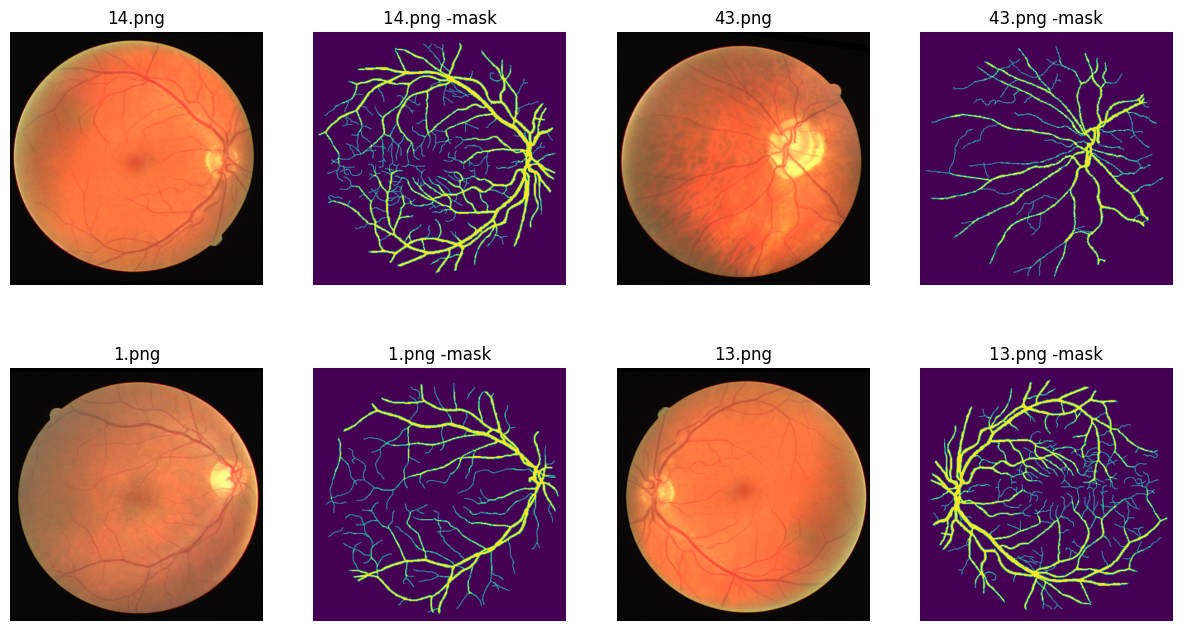

In [4]:
show_imgs = 4 #gösterilecek görsel sayısını belirliyoruz.
idx = np.random.choice(len(train_df), show_imgs, replace=False) #veri setinden rastgele 4 görsel seçmesini sağlıyoruz.

fig, axes = plt.subplots(show_imgs*2//4, 4, figsize=(15, 8)) #görsel ve maskeleri yan yana gözükecek şekilde gösterim alanı ve boyutlarını tanımlıyoruz.
axes = axes.flatten() #ayarlanan yerleri kolayca kullanabilmek için düz liste haline getiriyoruz.
for i, ax in enumerate(axes):
    new_i = i//2 #görsellerin ve maskelerin hangi sırayla geldiğini ayarlıyoruz.
    if i % 2 ==0 :
        full_path = train_df.loc[idx[new_i]]['images']
        basename = os.path.basename(full_path) 
    else:                              # bu kısımlar ile önce görseli sonra maskesini dosya yollarından alarak getirmeyi sağlıyoruz.
        full_path = train_df.loc[idx[new_i]]['masks']
        basename = os.path.basename(full_path) + ' -mask' 
    ax.imshow(plt.imread(full_path)) #seçilen görseli ve maskeyi gösteriyoruz.
    ax.set_title(basename) # hangi görselerin alındığını bilmek için görsellerin üstüne adını yerleştiriyoruz.
    ax.set_axis_off() # grafikteki eksenleri ve sayıların görünümü kapatarak sadece görselleri kontrol etmiş oluyoruz.

In [5]:
train_transforms = A.Compose([ #bu kısımda eğitim görsellerinin nasıl yeniden boyutlandırılacağını ve döndürme detaylarını belirliyoruz. bu sayede veriyi büyütüyoruz.
    A.Resize(576, 576),
    A.RandomCrop(height=512, width=512, always_apply=True),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.01, scale_limit=(-0.04,0.04), rotate_limit=(-15,15), p=0.5),
    
])

test_transforms = A.Compose([ #burada ise sadece boyutlandırma yapıyoruz.
    A.Resize(512, 512),
    # ToTensorV2(),
])

class MyDataset(torch.utils.data.Dataset): # burada veri seti sınıfımızı işliyoruz.
    def __init__(self, dataframe, transforms_=None): #init başlatıcı fonksiyondur. fonksiyon ile veri setini ve dönüşümleri alarak işleme başlıyoruz.
        self.df = dataframe
        # Verileri artırmak ve görüntüleri torch'un işleyebileceği tensörlere dönüştürmek için dönüşümleri kullanıyoruz.
        self.transforms_ = transforms_
        self.pre_normalize = v2.Compose([
            v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        self.resize = [512, 512]
        self.class_size = 2
        
    def __len__(self): #len fonksiyonu toplam örnek sayısını döndürerek işlemi çalıştırmaktadır.
        return len(self.df)
    
    def __getitem__(self, index): # bu fonksiyon veri setinde sırayla gelen örneği alıp işlemeye başlar.
        img = cv2.cvtColor(cv2.imread(self.df.iloc[index]['images']), cv2.COLOR_BGR2RGB) #görseli okur ve renkleri BGR formatından RGB formatına dönüştürür.
        mask = cv2.imread(self.df.iloc[index]['masks'],cv2.IMREAD_GRAYSCALE) # aynı index yani sıraya karşılık gelen maskeleri gri tonlamada okur.
        mask = np.where(mask<127, 0, 1).astype(np.int16) #maskeyi ikili format sistemine dönüştürür. maskenin pikselleri 127 den küçükse siyah(0), değilse beyaz(1) şekilde dönüştürülür.
        aug = self.transforms_(image=img, mask=mask) #görsel ve maskeye belirnen dönüşümleri uygular.           
        img, mask = aug['image'], aug['mask']
        img = img/255 #görsel piksellerini 0-1 aralığına kolay işlenmesi adına ölçeklendirir.
        #normalleştirme aşamasını uygularız.
        img = torch.tensor(img, dtype=torch.float).permute(2, 0, 1) #görseli pytorch tensörüne çevirir ve boyutlarını düzenler.
        target = torch.tensor(mask, dtype=torch.long) #maskeyi pytorch tensörüne çevirir.
        sample = {'x': img, 'y': target}
        return sample #işlenmiş görsel ve maskeyi sonuç olarak gösterir.

In [6]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu") # görsellerin eğitileceği cihazımızı ayarlıyoruz. GPU varsa onu kullanacak, yoksa CPU'yu kullanacak şekilde ayarlıyoruz.
train_dataset = MyDataset(train_df, train_transforms) # eğitilecek görsel verilerimizi ve onlara uygulanacak dönüşümleri içeren bir veri kümesi tanımlıyoruz.
val_dataset = MyDataset(test_df, test_transforms) # test edilecek görsel verilerimizi ve onlara uygulanacak dönüşümleri içeren başka bir veri kümesi tanımlıyoruz.

BATCH_SIZE = 8 # her seferinde modele verilecek veri miktarını (8 veri örneği bulunacak) belirliyoruz.
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,shuffle=True) # eğitim verilerini karıştıracak ve belirlenen miktarlarda modele dahil etmek için bir yükleyici ayarlıyoruz.
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE) #  test verilerini belirlenen miktarlarda modele dahil etmek için başka bir yükleyici ayarlıyoruz.
print(f'len train: {len(train_df)}') # eğitim veri kümesindeki toplam veri sayısını görmemiz için yazdırıyoruz.
print(f'len val: {len(test_df)}')  # test veri kümesindeki toplam veri sayısını görmemiz için yazdırıyoruz.

len train: 80
len val: 20


In [7]:
class_size = 1   # modelin çıktıda kaç sınıf tahmin edeceğini belirtir. Bu örnekte, sadece 1 sınıfımız var.
model = smp.Unet( #  Bir U-Net modeli oluşturuyoruz. Bu modelle "resnet50" adlı bir yapıyı kullanıyoruz. 
    encoder_name="resnet50",   # "imagenet" encoderi ile veri kümesiyle önceden eğitilmiş ağırlıkları kullanmasını sağlıyoruz.     
    encoder_weights="imagenet",     
    in_channels=3,                  # Modelin girişi RGB ve çıktısı class_size (1 sınıf) olarak ayarlanmıştır.
    classes=class_size,                      
)

device = 'cuda' if torch.cuda.is_available() else 'cpu' # Eğitim işlemini GPU'da yapacak şekilde ayarlıyoruz.
model(torch.randn((1,3,512,512))).shape # Modeli rastgele o anda oluşturulmuş bir giriş verisiyle test eder. Bu veri, boyutu (1, 3, 512, 512) olan bir tensor'dur. Sonra bu testin çıktı boyutunu görmemiz için yazdırır.

torch.Size([1, 1, 512, 512])

In [8]:
def train(dataloader, model, loss_fn, optimizer, lr_scheduler): 
    size = len(dataloader.dataset) # Veri setindeki toplam örnek sayısını tanımlıyoruz.
    num_batches = len(dataloader) # Bir eğitim devirinde veri yığınlarını tanımlıyoruz.
    model.train() # Modeli eğitim moduna alır.
    epoch_loss = 0 # eğitim aşamasında her devir için toplam kayıp ve 
    epoch_iou_score = 0 # IoU skorunu sıfırlıyoruz.
    for batch_i, batch in enumerate(dataloader): # Veri yükleyici üzerinde döngü yapar, her döngüde bir veri yığını alırız.
        x, y = batch['x'].to(device), batch['y'].to(device) # Veri yığınındaki giriş (x) ve çıktı (y) verilerini GPU'ya taşır.
        optimizer.zero_grad() # Optimizatörün gradyanlarını sıfırlar.
        pred = model(x) #  Modeli kullanarak tahminler yapar.
        loss = loss_fn(pred, y) # Gerçek ve tahmin edilen değerler arasındaki kaybı hesaplatıyoruz.

        loss.backward() # Kayıp fonksiyonunun gradyanını hesaplar.
        optimizer.step() # Model parametrelerini günceller.
        epoch_loss += loss.item() # Mevcut kaybı toplam kayba ekler.
        pred = pred.squeeze(dim=1) # Tahminlerin boyutunu düzenler.
        pred = torch.sigmoid(pred) # Tahminleri sigmoid fonksiyonuyla normalleştirir.
        y = y.round().long() #  Gerçek değerleri uygun formata dönüştürür.
        # Aşağıdaki satırlar, IoU skorunu hesaplar ve toplar, böylece performansı değerlendirmiş oluruz.
        tp, fp, fn, tn = smp.metrics.get_stats(pred, y, mode='binary', threshold=0.5)
        iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro").item()
        epoch_iou_score += iou_score
        lr_scheduler.step()
    # Öğrenme oranı zamanlamacısını bir adım ilerletir.
    return epoch_loss/num_batches, epoch_iou_score/num_batches # Ortalama kayıp ve IoU skorunu bize göstrir. 



def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) 
    num_batches = len(dataloader) 

    model.eval() 
    epoch_loss = 0
    epoch_iou_score = 0
    
    with torch.no_grad():
        for batch_i, batch in enumerate(dataloader):
            x, y = batch['x'].to(device), batch['y'].to(device) 

            
            pred = model(x)
            loss = loss_fn(pred, y)

            
            epoch_loss += loss.item()
            pred = pred.squeeze(dim=1)
            pred = torch.sigmoid(pred)
            y = y.round().long()
            tp, fp, fn, tn = smp.metrics.get_stats(pred, y, mode='binary', threshold=0.5)
            iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro").item()
            epoch_iou_score += iou_score
            
    return epoch_loss/num_batches, epoch_iou_score/num_batches

In [11]:
EPOCHS = 50 # Modelin eğitileceği toplam döngü sayısını 50 olarak belirliyoruz.
logs = {
    'train_loss': [], 'val_loss': [],
    'train_iou_score': [], 'val_iou_score': [],
}
 
# Eğitim ve doğrulama kayıplarını ('train_loss', 'val_loss') ve IoU skorlarını ('train_iou_score', 'val_iou_score') kaydetmek için alan oluşturuyoruz. 

if os.path.exists('checkpoints') == False:
    os.mkdir("checkpoints")  # Eğer 'checkpoints' adında bir klasör yoksa, bu klasörü oluşturur. Modelin durumunu kaydetmek için kullanılır.
 

loss_fn = smp.losses.DiceLoss(mode="binary") # Modelin ne kadar iyi performans gösterdiğini ölçmek için kullanılan, "binary" modda Dice Loss adında bir hata hesaplama yöntemi seçer.

learning_rate = 0.001 # Modelin eğitim sırasında ne kadar hızlı öğreneceğini belirleyen öğrenme oranını (learning rate) 0.001 olarak ayarlar.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Modelin parametrelerini, belirlenen öğrenme oranı ile güncellemek için Adam optimizatörünü kullanır.
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = 100, gamma=0.1) # Her 100 adımda bir modelin öğrenme oranını 0.1 oranında azaltacak bir zamanlayıcı ayarlar.

# Earlystopping
patience = 5 # Modelin iyileşip iyileşmediğini kontrol ederken, 5 epoch boyunca bekleyeceğini belirtir.
counter = 0 # Bu sayaç, modelin üst üste kaç epoch boyunca iyileşmediğini sayar.
best_loss = np.inf # Şu ana kadar elde edilen en iyi kaybı saklamak için kullanılır. Başlangıçta sonsuz olarak ayarlanır.

model.to(device) # Modeli hesaplamaların yapılacağı cihaza (GPU veya CPU) taşır.
for epoch in tqdm(range(EPOCHS)): # Toplamda 50 epoch boyunca bir döngü başlatır. tqdm, ilerlemeyi gösteren bir araçtır.
    train_loss, train_iou_score = train(train_loader, model, loss_fn, optimizer, step_lr_scheduler)
    val_loss, val_iou_score = test(val_loader, model, loss_fn)
    logs['train_loss'].append(train_loss)
    logs['val_loss'].append(val_loss)
    logs['train_iou_score'].append(train_iou_score)
    logs['val_iou_score'].append(val_iou_score)
# Her epoch sonucunda, elde edilen eğitim ve test kayıp ve IoU skorlarını logs sözlüğüne ekler.
    
    print(f'EPOCH: {str(epoch+1).zfill(3)}  \
    train_loss: {train_loss:.4f}, val_loss: {val_loss:.4f} \
    train_iou_score: {train_iou_score:.3f}, val_iou_score: {val_iou_score:.3f} \
    lr: {optimizer.param_groups[0]["lr"]}')
    # Her epoch sonunda, o anki eğitim ve test kayıp ve IoU skorlarını ve öğrenme oranını ekrana yazdırır.

    
    torch.save(model.state_dict(), "checkpoints/last.pth") # Her epoch sonunda modelin şu anki durumunu 'last.pth' adlı dosyaya kaydeder.
    
    if val_loss < best_loss:
        counter = 0
        best_loss = val_loss 
        torch.save(model.state_dict(), "checkpoints/best.pth") # Eğer mevcut test kaybı, şu ana kadar elde edilen en iyi kayıptan daha düşükse, sayacı sıfırlar, en iyi kaybı günceller ve modelin o anki en iyi durumunu 'best.pth' dosyasına kaydeder.
    else:
        counter += 1  #  Eğer test kaybı iyileşme göstermezse, sayacı artırır.
    if counter >= patience:
        print("Earlystop!")
        break
    # Eğer sayaç, belirlenen sabır süresine (5 epoch) ulaşırsa, "Earlystop!" mesajını yazdırır ve eğitim döngüsünü durdurur. Bu, modelin daha fazla iyileşmediğini gösterir.

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH: 001      train_loss: 0.7132, val_loss: 0.8402     train_iou_score: 0.239, val_iou_score: 0.092     lr: 0.001


  2%|▏         | 1/50 [00:47<39:03, 47.82s/it]

EPOCH: 002      train_loss: 0.6116, val_loss: 0.7220     train_iou_score: 0.395, val_iou_score: 0.312     lr: 0.001


  4%|▍         | 2/50 [01:37<38:55, 48.66s/it]

EPOCH: 003      train_loss: 0.5443, val_loss: 0.6369     train_iou_score: 0.466, val_iou_score: 0.308     lr: 0.001


  6%|▌         | 3/50 [02:26<38:22, 49.00s/it]

EPOCH: 004      train_loss: 0.4740, val_loss: 0.4943     train_iou_score: 0.525, val_iou_score: 0.503     lr: 0.001


  8%|▊         | 4/50 [03:15<37:39, 49.13s/it]

EPOCH: 005      train_loss: 0.4121, val_loss: 0.5075     train_iou_score: 0.558, val_iou_score: 0.528     lr: 0.001


 10%|█         | 5/50 [04:04<36:50, 49.13s/it]

EPOCH: 006      train_loss: 0.3701, val_loss: 0.4262     train_iou_score: 0.570, val_iou_score: 0.506     lr: 0.001


 12%|█▏        | 6/50 [05:11<38:06, 51.97s/it]


KeyboardInterrupt: 

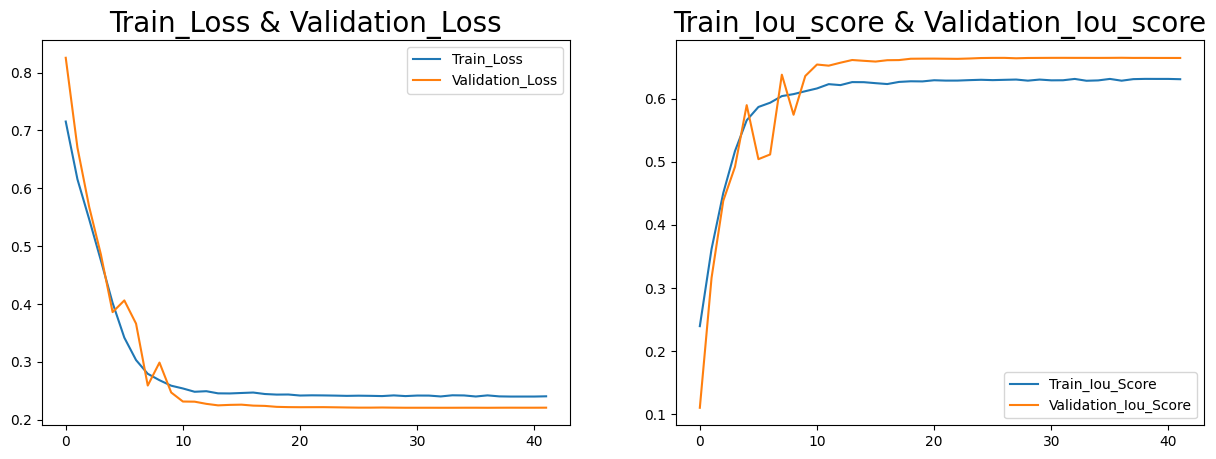

In [24]:
plt.figure(figsize=(15,5)) # 15x5 boyutunda bir grafik penceresi oluşturur.
plt.subplot(1,2,1) # İki grafikten ilkinin oluşturulması için yer ayarlar. 1,2,1 demek, 1 sıra, 2 sütun içinde ilk sütunu kullan anlamına gelir.
plt.plot(logs['train_loss'],label='Train_Loss') # Eğitim kaybını (train loss) çizer.
plt.plot(logs['val_loss'],label='Validation_Loss') # Doğrulama kaybını (validation loss) çizer.
plt.title('Train_Loss & Validation_Loss',fontsize=20) # Grafiğe başlık ekler.
plt.legend() # Her çizginin neyi temsil ettiğini gösteren bir açıklama kutusu (legend) ekler.
plt.subplot(1,2,2) # İki grafikten ikincisinin oluşturulması için yer ayarlar. 1,2,2 demek, 1 sıra, 2 sütun içinde ikinci sütunu kullan anlamına gelir.
plt.plot(logs['train_iou_score'],label='Train_Iou_Score') # Eğitim IoU skorunu çizer.
plt.plot(logs['val_iou_score'],label='Validation_Iou_Score') # Doğrulama IoU skorunu çizer.
plt.title('Train_Iou_score & Validation_Iou_score',fontsize=20) # Grafiğe başlık ekler.
plt.legend() # Her çizginin neyi temsil ettiğini gösteren bir açıklama kutusu (legend) ekler.

In [25]:
class TestDataset(torch.utils.data.Dataset): # TestDataset adında, PyTorch'un Dataset sınıfından türetilen bir sınıf tanımlar. Bu sınıf, test veri seti üzerinde işlem yapmak için kullanılacak.
    def __init__(self, dataframe,transforms_=None): # Sınıfın başlatıcı fonksiyonudur. Veri setini, dönüşümleri (transforms_), normalizasyon ve yeniden boyutlandırma işlemleri için gerekli parametreleri alır.
        self.df = dataframe # Veri setini içeren DataFrame'i sınıfın bir özelliği olarak ayarlar.
        self.transforms_ = transforms_ # Görüntü dönüşüm işlemlerini tanımlar.
        self.pre_normalize = v2.Compose([ # Görüntülerin normalizasyonunu yapacak işlemleri tanımlar. Bu, görüntüyü standart bir forma getirmek için kullanılır.
            v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        self.resize = [512, 512]
        self.class_size = 2
        
    def __len__(self):
        return len(self.df) # Veri setindeki örnek sayısını çalıştırarak işlem yapar.
    
    def __getitem__(self, index):  # Veri setinden belirli bir indeksteki örneği almak için kullanılır.
        img = cv2.cvtColor(cv2.imread(self.df.iloc[index]['images']), cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.df.iloc[index]['masks'],cv2.IMREAD_GRAYSCALE)
        aug = self.transforms_(image=img, mask=mask)            
        img, mask = aug['image'], aug['mask']
        img_view = np.copy(img)
        img = img/255 # Görüntüyü ve maskesini okur, dönüşümleri uygular ve tensor formatına dönüştürür.
        # Görüntüyü normalize eder ve görüntü ile maskeyi döndürmek üzere bir sözlük hazırlar.
        img = torch.tensor(img, dtype=torch.float).permute(2, 0, 1)
        mask_view = np.copy(mask)
        mask = np.where(mask<127, 0, 1).astype(np.int16)
        target = torch.tensor(mask, dtype=torch.long)
        sample = {'x': img, 'y': target, 'img_view':img_view, 'mask_view':mask_view}
        return sample

test_dataset = TestDataset(test_df, test_transforms) # Test veri setini oluşturur.
test_loader = DataLoader(test_dataset, batch_size=4) # Veri setini yüklemek ve mini-batch'ler halinde işlemek için bir veri yükleyici oluşturur.

In [26]:
model.load_state_dict(torch.load('c:/Users/Fatih Eskici/Desktop/checkpoints/best.pth')) # Daha önce kaydedilmiş olan en iyi model ağırlıklarını 'best.pth' dosyasından yükler.
model.to(device)  # Modeli hesaplamalar için kullanılacak cihaza (örneğin, GPU) taşır.

def get_metrics(model, dataloder, threshold): #  Modelin performans metriklerini (IoU, doğruluk, F1 skoru, vb.) hesaplayan bir fonksiyon tanımlar. Bu fonksiyon, model, veri yükleyici ve eşik değeri alır.
    IoU_score, precision, f1_score, recall, acc= 0, 0, 0, 0, 0 # Metrikler için başlangıç değerlerini sıfır olarak ayarlar.
    batchs = 0 #  İşlenen veri yığınlarının (batch) sayısını tutacak bir sayaç başlatır.
    model.eval() # Modeli değerlendirme/test moduna alır.
    with torch.no_grad(): # Gradyan hesaplamasını devre dışı bırakarak model değerlendirmesi yapar.
        for batch_i, batch in enumerate(dataloder):
            x, y = batch['x'].to(device), batch['y'].to(device) # Giriş (x) ve çıktı (y) verilerini alır ve GPU'ya taşır.
            pred = model(x)
            pred = pred.squeeze(dim=1)
            pred = torch.sigmoid(pred)  # Model ile tahmin yapar ve tahminleri işler.
            y = y.round().long() # Gerçek (y) ve tahmin edilen (pred) değerleri kullanarak performans metrikleri hesaplar.
            tp, fp, fn, tn = smp.metrics.get_stats(pred, y, mode='binary', threshold=threshold)
            batch_iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro").item()
            batch_acc = smp.metrics.accuracy(tp, fp, fn, tn, reduction="micro").item()
            batch_f1_score = smp.metrics.f1_score(tp, fp, fn, tn, reduction="micro").item()
            batch_recall = smp.metrics.recall(tp, fp, fn, tn, reduction="micro").item()
            batch_precision = smp.metrics.precision(tp, fp, fn, tn, reduction="micro").item()
            IoU_score += batch_iou_score  # Hesaplanan her bir metriği toplar ve veri yığını sayısını artırır.
            acc += batch_acc
            f1_score += batch_f1_score  # Toplanan metriklerin ortalamasını alır ve bunları yuvarlar. Hesaplanan ortalama metrikleri gösteririz.
            recall += batch_recall
            precision += batch_precision
            batchs += 1
    IoU_score = round(IoU_score/batchs, 3)
    precision = round(precision/batchs, 3)
    f1_score = round(f1_score/batchs, 3)
    recall = round(recall/batchs, 3)
    acc = round(acc/batchs, 3)
    sample = {'iou':IoU_score, 'pre':precision, 'fi':f1_score, 're':recall, 'acc':acc}
    return sample
    
threshold_list = [0.3, 0.4, 0.5, 0.6, 0.7]
for threshold in threshold_list:
    sample = get_metrics(model, test_loader, threshold) # Belirlediğimiz eşik değerleri listesi üzerinde döngü yaparak sonuçları gösterir. 
    print(f"threshold: {str(threshold)} \
    IoU Score: {sample['iou']:.3f} \
    precision: {sample['pre']:.3f} \
    f1_score: {sample['fi']:.3f} \
    Recall: {sample['re']:.3f} \
    Acc: {sample['acc']:.3f}")
    #Her eşik değeri için get_metrics fonksiyonunu çağırarak metrikleri hesaplar ve yazdırır.  IOU skoru eşik değerini aşıyorsa modelin tahmini işaretleme doğruluğunu iyi durumda kabul ederiz.

threshold: 0.3     IoU Score: 0.660     precision: 0.762     f1_score: 0.795     Recall: 0.834     Acc: 0.962
threshold: 0.4     IoU Score: 0.663     precision: 0.778     f1_score: 0.797     Recall: 0.822     Acc: 0.964
threshold: 0.5     IoU Score: 0.665     precision: 0.792     f1_score: 0.799     Recall: 0.810     Acc: 0.964
threshold: 0.6     IoU Score: 0.666     precision: 0.806     f1_score: 0.799     Recall: 0.797     Acc: 0.965
threshold: 0.7     IoU Score: 0.665     precision: 0.820     f1_score: 0.798     Recall: 0.781     Acc: 0.966


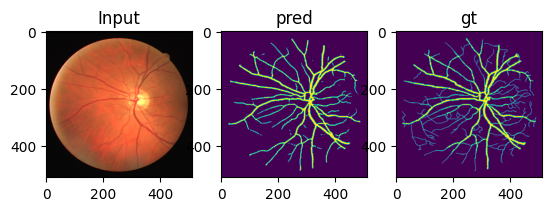

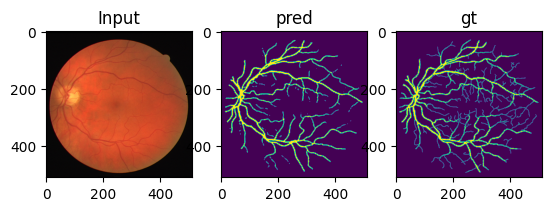

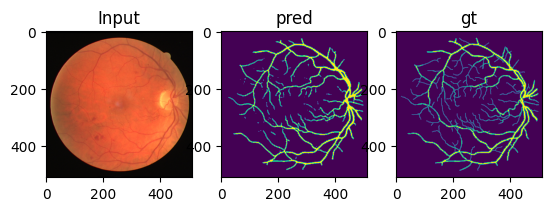

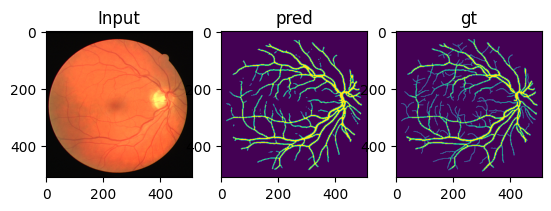

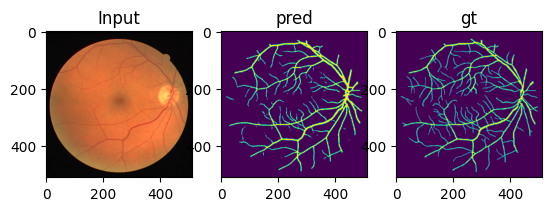

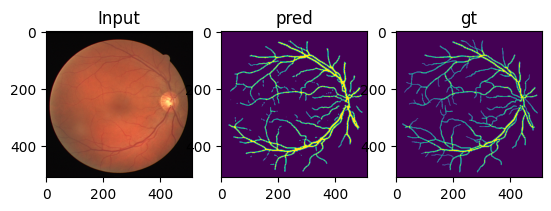

In [28]:
model.load_state_dict(torch.load("c:/Users/Fatih Eskici/Desktop/checkpoints/best.pth")) #Kaydedilmiş model ağırlıklarını yükler.
model.to(device) 
show_imgs = 6 # Gösterilecek görüntü sayısını 6 olarak belirliyoruz.
random_list = np.random.choice(len(test_dataset), show_imgs, replace=False) #  Test veri setinden rastgele 6 örnek seçer.

for i in range(show_imgs):  # Her bir rastgele seçilen örneği işler:
    idx = random_list[i] # Rastgele seçilen örneğin indeksini alır.
    sample = test_dataset[idx] # Test veri setinden bir örnek alır (test_dataset[idx]).
    pred = model(sample['x'].to('cuda', dtype=torch.float32).unsqueeze(0)) # Seçilen örneği modele verir ve tahmin yapar.
    pred = torch.sigmoid(pred).squeeze(0).squeeze(0) # Tahmini sigmoid fonksiyonu ile işler ve gereksiz boyutları sıkıştırır.
    pred = pred.data.cpu().numpy() # Tahmini numpy dizisine dönüştürür ve CPU'ya taşır.
    pred = np.where(pred<0.5, 0, 1).astype(np.int16) # Tahmini 0.5 eşiğine göre ikili maskeye dönüştürür.
    pred_img = Image.fromarray(np.uint8(pred), 'L') # Tahmin edilen maskeyi görüntüye dönüştürür.

    img_view = sample['img_view'] # Örnekten orijinal görüntüyü ve gerçek maskesini alır.
    img_view = Image.fromarray(img_view, 'RGB') # Görüntü ve maskeyi PIL görüntüsüne dönüştürür.
    
    mask_view = sample['mask_view'] # Örnekten orijinal görüntüyü ve gerçek maskesini alır.
    mask_view = Image.fromarray(mask_view, 'L') # Görüntü ve maskeyi PIL görüntüsüne dönüştürür.
                
    f, axarr = plt.subplots(1, 3) # Üç görüntü için subplot (alt grafik) oluşturur.
    axarr[0].imshow(img_view) #  Orijinal görüntüyü, tahmin edilen maskeyi ve gerçek maskeyi gösterir.
    axarr[0].set_title('Input') # Input grafiği için başlık ekler.
    axarr[1].imshow(pred_img) #  Orijinal görüntüyü, tahmin edilen maskeyi ve gerçek maskeyi gösterir.
    axarr[1].set_title('pred') # Pred grafiği için başlık ekler.
    axarr[2].imshow(mask_view) #  Orijinal görüntüyü, tahmin edilen maskeyi ve gerçek maskeyi gösterir.
    axarr[2].set_title('gt') # Gt grafiği için başlık ekler.
    plt.show() # Görselleştirmeyi ekranda gösterir.